In [1]:
import pandas as pd
bace_data_mordred = pd.read_csv('combined_bace_inhibitors_ki_and_mordred_descriptors.csv')
bace_ki = bace_data_mordred[['Ki (nM)']]
bace_ki.describe()

,Ki (nM)
count,349.000000
mean,232.188734
std,1211.630519
min,0.110000
25%,6.800000
50%,24.000000
75%,121.000000
max,20662.000000


In [2]:
# standardization using standaard scaler

from sklearn.preprocessing import StandardScaler

scale= StandardScaler() 
 
scaled_data = pd.DataFrame(scale.fit_transform(bace_ki))
scaled_data.describe()

,0
count,3.490000e+02
mean,-1.526954e-17
std,1.001436e+00
min,-1.918175e-01
25%,-1.862881e-01
50%,-1.720720e-01
75%,-9.189961e-02
max,1.688563e+01


In [3]:

# test for gaussian distribution of unscaled ki using  Shapiro-Wilk test
from scipy.stats import shapiro
import pandas as pd

def shapiro_test(data):
    stat, p = shapiro(data)
    print(stat, p)

    if p > 0.05:
        print(f'data is likely Gaussian (p={p:.3f})')
    else:
        print(f'data is not likely Gaussian (p={p:.3f})')


In [4]:
# test for normal distribution of scaled_data(ki) using standard scaler
shapiro_test(scaled_data)

0.1463213562965393 8.159494150535802e-37
data is not likely Gaussian (p=0.000)


In [5]:
# using minmaxscaler to normalize

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print("scaler fit", scaler.fit(bace_ki))
print("scaler data_max", scaler.data_max_)
scaled_ki = pd.DataFrame(scaler.transform(bace_ki))
scaled_ki.to_csv("bace_ki_minmax_scale.csv", index=False)
scaled_ki.describe()

scaler fit MinMaxScaler()
scaler data_max [20662.]


,0
count,349.000000
mean,0.011232
std,0.058641
min,0.000000
25%,0.000324
50%,0.001156
75%,0.005851
max,1.000000


In [6]:
# test for normal distribution of scaled_data(ki) using minmax scaler
shapiro_test(scaled_ki)

0.1463213562965393 8.159494150535802e-37
data is not likely Gaussian (p=0.000)


C:\Users\adewa\AppData\Local\Temp\ipykernel_21228\308404625.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scaled_ki, shade=True)


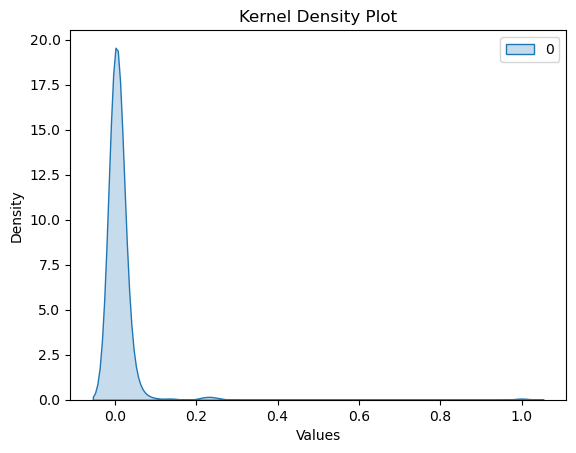

In [7]:
import  seaborn as sns
import matplotlib.pyplot as plt


# Kernel Density Plot
sns.kdeplot(scaled_ki, shade=True)
plt.title("Kernel Density Plot")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()
